<a href="https://colab.research.google.com/github/parwinderau/machinelearning/blob/main/wind_data_analysis_ML_class_rf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wind Data Analysis V2

In [1]:
import numpy as np

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

resolution = 200 # dpi value for figures

In [2]:
import pandas as pd

def load_wind_data():
    csv_file =  'wind_data.csv'
    return pd.read_csv(csv_file, sep=',')

In [3]:
from datetime import datetime, date
from sklearn.utils import shuffle

wind = load_wind_data()
wind = shuffle(wind, random_state = 42)

wind

,Dato for oprindelig nettilslutning,Kapacitet (kW),Rotor-diameter (m),Navhøjde (m),Fabrikat,Model,Kommune,Type af placering,X (øst) koordinat \nUTM 32 Euref89,Y (nord) koordinat \nUTM 32 Euref89,2019,Kapacitetsfaktor 2019,Latitude,Longitude,Air Density,Temperature,Wind Speed,SWT
3690,12/23/2017,3600.0,117.0,91.0,Vestas Wind Systems A/S,V117-3.6 MW,Ringkøbing-Skjern,LAND,463973.120,6190384.80,9.070756e+06,0.287632,55.857636,8.424459,1.24253,282.25834,7.86082,1.14113
3527,5/17/1989,30.0,15.0,18.5,Vestas Wind Systems A/S,V 30-15,Ringkøbing-Skjern,LAND,462455.310,6204786.95,0.000000e+00,0.000000,55.986917,8.398211,1.24253,282.22612,8.01426,1.14113
724,08/04/1997,600.0,44.0,35.0,BONUS,600 - MK lll,Guldborgsund,LAND,693781.160,6068760.88,1.084922e+06,0.206416,54.728719,12.009514,1.24372,282.77364,8.67933,0.59659
3370,02/08/2003,2300.0,84.6,61.2,BONUS,"2,3 MW",Samsø,HAV,599459.657,6176052.74,8.344240e+06,0.414147,55.720000,10.583373,1.2424046,282.57922,8.26837,0.488765744
468,6/21/2010,2300.0,92.6,80.0,SIEMENS,SWT 2.3-93,Lolland,HAV,659755.000,6050549.00,9.028376e+06,0.448103,54.577163,11.471729,1.24325,282.91931,8.53048,0.68284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,9/20/2015,10.0,14.0,18.0,Solid Wind Power A/S,SWP10-14TG20,Ringkøbing-Skjern,Land,462780.140,6202349.50,3.787238e+04,0.432333,55.965043,8.403754,1.24253,282.22844,7.98368,1.14113
5191,4/17/1989,200.0,24.0,30.0,Danwin,DW 24-Danwin,Odsherred,LAND,671087.270,6199349.33,1.630715e+05,0.093077,55.909111,11.737166,1.24383,282.18144,7.63383,Nan
5226,01/01/1991,200.0,27.0,30.0,Micon,M 570,Holbæk,LAND,674394.700,6184768.67,3.662736e+05,0.209060,55.777069,11.780648,1.24438,282.08670,7.44871,0.50645
5390,11/08/1996,250.0,29.2,31.5,Wind World,W 2920-250,Hjørring,LAND,562497.820,6362683.06,3.527500e+05,0.161073,57.402620,10.040088,1.2438,282.12726,7.74181,0.75402


In [4]:
def to_years(x):
    d = datetime.strptime(x,"%m/%d/%Y")
    return float(d.year)+(float(d.month)-1)/12.0+(float(d.day)-1)/365.0
    

wind["Type af placering"].replace({'LAND': 0, 'Land': 0, 'Hav' : 1, 'HAV' : 1}, inplace = True)
wind["Dato for oprindelig nettilslutning"]  = wind["Dato for oprindelig nettilslutning"].apply(lambda x: to_years(x))
wind

,Dato for oprindelig nettilslutning,Kapacitet (kW),Rotor-diameter (m),Navhøjde (m),Fabrikat,Model,Kommune,Type af placering,X (øst) koordinat \nUTM 32 Euref89,Y (nord) koordinat \nUTM 32 Euref89,2019,Kapacitetsfaktor 2019,Latitude,Longitude,Air Density,Temperature,Wind Speed,SWT
3690,2017.976941,3600.0,117.0,91.0,Vestas Wind Systems A/S,V117-3.6 MW,Ringkøbing-Skjern,0,463973.120,6190384.80,9.070756e+06,0.287632,55.857636,8.424459,1.24253,282.25834,7.86082,1.14113
3527,1989.377169,30.0,15.0,18.5,Vestas Wind Systems A/S,V 30-15,Ringkøbing-Skjern,0,462455.310,6204786.95,0.000000e+00,0.000000,55.986917,8.398211,1.24253,282.22612,8.01426,1.14113
724,1997.591553,600.0,44.0,35.0,BONUS,600 - MK lll,Guldborgsund,0,693781.160,6068760.88,1.084922e+06,0.206416,54.728719,12.009514,1.24372,282.77364,8.67933,0.59659
3370,2003.102511,2300.0,84.6,61.2,BONUS,"2,3 MW",Samsø,1,599459.657,6176052.74,8.344240e+06,0.414147,55.720000,10.583373,1.2424046,282.57922,8.26837,0.488765744
468,2010.471461,2300.0,92.6,80.0,SIEMENS,SWT 2.3-93,Lolland,1,659755.000,6050549.00,9.028376e+06,0.448103,54.577163,11.471729,1.24325,282.91931,8.53048,0.68284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,2015.718721,10.0,14.0,18.0,Solid Wind Power A/S,SWP10-14TG20,Ringkøbing-Skjern,0,462780.140,6202349.50,3.787238e+04,0.432333,55.965043,8.403754,1.24253,282.22844,7.98368,1.14113
5191,1989.293836,200.0,24.0,30.0,Danwin,DW 24-Danwin,Odsherred,0,671087.270,6199349.33,1.630715e+05,0.093077,55.909111,11.737166,1.24383,282.18144,7.63383,Nan
5226,1991.000000,200.0,27.0,30.0,Micon,M 570,Holbæk,0,674394.700,6184768.67,3.662736e+05,0.209060,55.777069,11.780648,1.24438,282.08670,7.44871,0.50645
5390,1996.852511,250.0,29.2,31.5,Wind World,W 2920-250,Hjørring,0,562497.820,6362683.06,3.527500e+05,0.161073,57.402620,10.040088,1.2438,282.12726,7.74181,0.75402


In [5]:
wind["Type af placering"].value_counts()

0    5016
1     558
Name: Type af placering, dtype: int64

In [6]:
wind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5574 entries, 3690 to 860
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Dato for oprindelig nettilslutning  5574 non-null   float64
 1   Kapacitet (kW)                      5574 non-null   float64
 2   Rotor-diameter (m)                  5574 non-null   float64
 3   Navhøjde (m)                        5574 non-null   float64
 4   Fabrikat                            5574 non-null   object 
 5   Model                               5574 non-null   object 
 6   Kommune                             5573 non-null   object 
 7   Type af placering                   5574 non-null   int64  
 8   X (øst) koordinat 
UTM 32 Euref89   5574 non-null   float64
 9   Y (nord) koordinat 
UTM 32 Euref89  5574 non-null   float64
 10  2019                                5544 non-null   float64
 11  Kapacitetsfaktor 2019               5574 

In [7]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [8]:
independent_variables = [0, 1, 2, 3, 7, 12, 13, 15, 16]

drop_columns = [i for i in range(18) if not i in independent_variables]
input_data = wind.drop(wind.columns[drop_columns], axis=1) 
labels = wind["Kapacitetsfaktor 2019"].copy()

In [9]:
input_data.head()

,Dato for oprindelig nettilslutning,Kapacitet (kW),Rotor-diameter (m),Navhøjde (m),Type af placering,Latitude,Longitude,Temperature,Wind Speed
3690,2017.976941,3600.0,117.0,91.0,0,55.857636,8.424459,282.25834,7.86082
3527,1989.377169,30.0,15.0,18.5,0,55.986917,8.398211,282.22612,8.01426
724,1997.591553,600.0,44.0,35.0,0,54.728719,12.009514,282.77364,8.67933
3370,2003.102511,2300.0,84.6,61.2,1,55.720000,10.583373,282.57922,8.26837
468,2010.471461,2300.0,92.6,80.0,1,54.577163,11.471729,282.91931,8.53048


In [10]:
labels.head()

3690    0.287632
3527    0.000000
724     0.206416
3370    0.414147
468     0.448103
Name: Kapacitetsfaktor 2019, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split

test_set_fraction = 0.10

X_train, X_test, y_train, y_test = train_test_split(input_data, labels, test_size=test_set_fraction, random_state=42)

X_train.head()

,Dato for oprindelig nettilslutning,Kapacitet (kW),Rotor-diameter (m),Navhøjde (m),Type af placering,Latitude,Longitude,Temperature,Wind Speed
1516,1998.215982,750.0,44.0,46.0,0,55.205745,8.775969,282.43815,7.48145
41,1996.060274,600.0,41.0,35.0,0,55.506465,11.336248,282.35990,7.94573
3131,2000.224201,750.0,48.2,45.0,0,56.258522,9.979074,281.94593,7.47656
2570,1997.707763,600.0,44.0,45.0,0,56.454282,8.775519,281.84702,7.53209
4699,2009.546575,2300.0,93.0,80.0,0,57.005463,9.363971,282.01385,7.36947


In [12]:
y_train.head()

1516    0.185220
41      0.144732
3131    0.167385
2570    0.221418
4699    0.389283
Name: Kapacitetsfaktor 2019, dtype: float64

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

compute_impurity_based_feature_importances = True
folder = "ml_class/graphs/rf"
folds_for_randomized_search   = 10
verbose_for_randomized_search = 5
n_iter_for_randomized_search  = 2

rf_grid = {'max_depth'        : [10, 15, None],
           'max_features'     : ['auto', 3, 6],
           'min_samples_leaf' : [3, 5, 10, 15],
           'n_estimators'     : [500, 1000, 1500]}

rf  = RandomForestRegressor()
reg = RandomizedSearchCV(estimator = rf, param_distributions = rf_grid, n_iter = n_iter_for_randomized_search, cv = folds_for_randomized_search, verbose=verbose_for_randomized_search, random_state=42, n_jobs = -1)

numerical_columns = [0, 1, 2, 3, 5, 6, 7, 8]

numerical_pipe = Pipeline([
    ('std_scaler', StandardScaler())
])

preprocessing = ColumnTransformer(transformers = [
    ('num', numerical_pipe, numerical_columns)
], remainder='passthrough')

reg_full = Pipeline([
    ('preprocess', preprocessing),
    ('regressor', reg)
])

reg_full.fit(X_train, y_train)

print("Best parameters for regressor:")
print(reg.best_params_)
reg.best_estimator_

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best parameters for regressor:
{'n_estimators': 1500, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': None}


RandomForestRegressor(min_samples_leaf=5, n_estimators=1500)

In [14]:
some_data = X_train[:5]
some_labels = y_train.iloc[:5]

print("Predictions:", reg_full.predict(some_data))

Predictions: [0.18843489 0.14823165 0.16617074 0.21951727 0.37798016]


In [15]:
print("Labels:", list(some_labels))

Labels: [0.185220091, 0.144731545, 0.167384821, 0.221418458, 0.389283341]


# Performance Check

In [16]:
print("Performance (CV) for the best regressor r2 =", reg.best_score_)

print("Performance on the training set r2 =", reg_full.score(X_train, y_train))

print("Performance on the test set     r2 =", reg_full.score(X_test, y_test))

Performance (CV) for the best regressor r2 = 0.8485092183153649
Performance on the training set r2 = 0.9273525716621591
Performance on the test set     r2 = 0.8227915766995187


# Impurity Based Feature Importance (only for trees or forests)

In [17]:
if compute_impurity_based_feature_importances:
    feature_names   = X_train.columns.tolist()
    a_feature_names = [feature_names[i] for i in numerical_columns]
    b_feature_names = []
    for i in range(len(input_data.columns)):
        if i not in numerical_columns:
            b_feature_names.append(feature_names[i])
    feature_names = a_feature_names + b_feature_names
    print("Feature names:", feature_names)

Feature names: ['Dato for oprindelig nettilslutning', 'Kapacitet (kW)', 'Rotor-diameter (m)', 'Navhøjde (m)', 'Latitude', 'Longitude', 'Temperature', 'Wind Speed', 'Type af placering']


In [18]:
if compute_impurity_based_feature_importances:
    print(reg.best_estimator_.feature_importances_)

[0.20916746 0.04469767 0.43786494 0.03474652 0.05010517 0.06455096
 0.11737102 0.03555355 0.00594271]


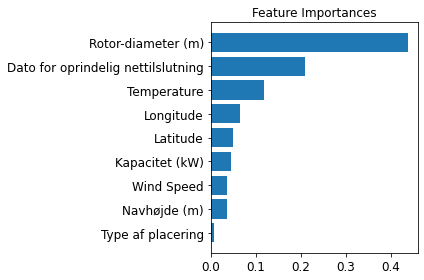

In [20]:
if compute_impurity_based_feature_importances:
    reg_feature_importances = (
        reg.best_estimator_.feature_importances_)
    sorted_idx = reg_feature_importances.argsort()

    feature_names = np.array(feature_names)

    y_ticks = np.arange(0, len(feature_names))
    fig, ax = plt.subplots()
    ax.barh(y_ticks, reg_feature_importances[sorted_idx])
    ax.set_yticklabels(feature_names[sorted_idx])
    ax.set_yticks(y_ticks)
    ax.set_title("Feature Importances")
    fig.tight_layout()
    #fig.savefig(folder + "/" + "impurity_based_feature_importance.pdf", dpi=resolution)
    plt.show()

# Permutation Based Feature Importance

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(reg_full, X_train, y_train, n_repeats=20,
                                random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_train.columns[sorted_idx])
ax.set_title("Permutation Importances")
fig.tight_layout()
#fig.savefig(folder + "/" + "permutation_importance.pdf", dpi=resolution)
plt.show()

# Partial Dependence Plots

Starting PDP for feature 0
Starting PDP for feature 1
Starting PDP for feature 2
Starting PDP for feature 3
Starting PDP for feature 4
Starting PDP for feature 5
Starting PDP for feature 6
Starting PDP for feature 7
Starting PDP for feature 8
Starting PDP for feature (6, 5)


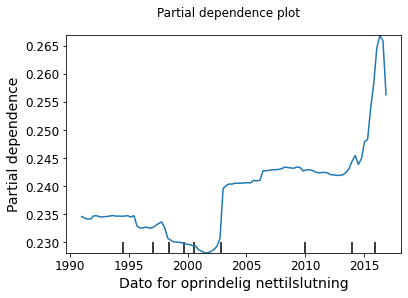

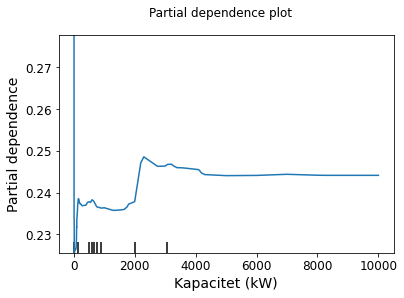

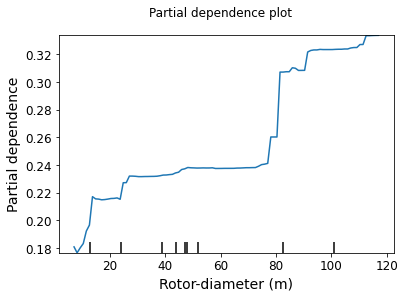

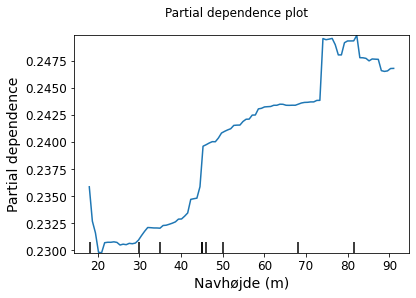

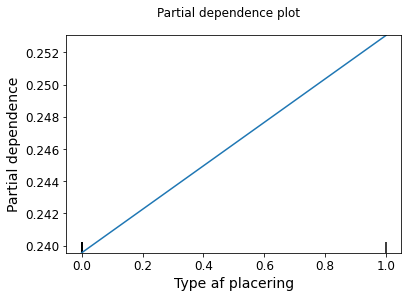

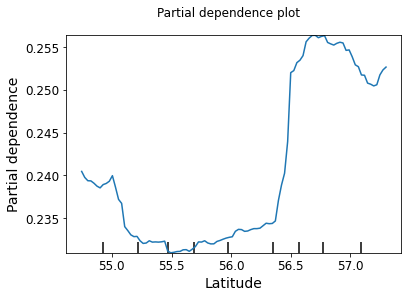

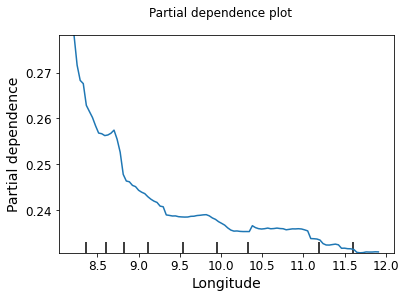

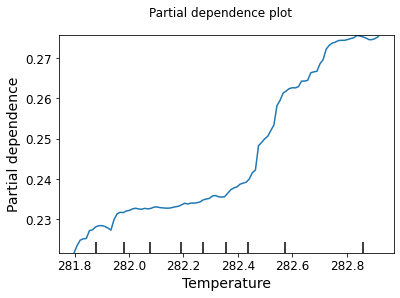

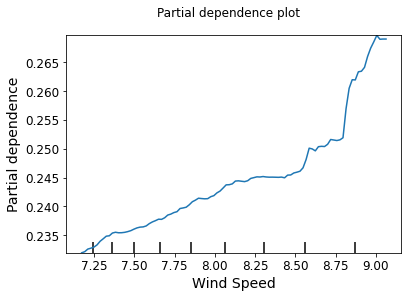

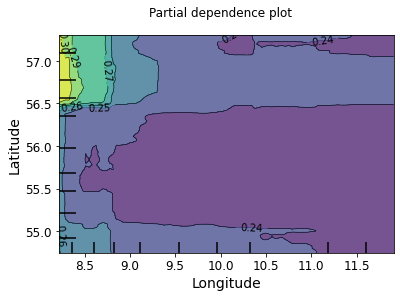

In [ ]:
from sklearn.inspection import plot_partial_dependence

grid_resolution = 100

fig_id = 0

for feature in [0, 1, 2, 3, 4, 5, 6, 7, 8, (6,5)]:
    features = [feature]
    
    print("Starting PDP for feature", feature)
    
    plot_partial_dependence(reg_full, X_train, features,
                            n_jobs=-1, grid_resolution=grid_resolution)
    fig = plt.gcf()
    fig.suptitle('Partial dependence plot')
    fig.subplots_adjust(wspace=0.3, hspace=0.3)

    fig_id   = fig_id + 1
    filename = folder + "/" + "partial_dependence_plot_" + str(fig_id) + ".pdf"
    fig.savefig(filename, dpi=resolution)